
# Project: Test a Perceptual Phenomenon (Stroop effect)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#set_up">Problem set-up</a></li>
<li><a href="#description">Statistical description of the dataset</a></li>
<li><a href="#test">Statistical test and results</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

When I began to work, about ten years ago, I had quite commuting time to join my workplace. I used this "imposed" free time to read, listen to music, but also play video games on the Nintendo DS game console I was given a few years before. 
Among the different games, I remember the Brain training program called (in French) "Quel âge a votre cerveau?" based on the work of the Japanese professor Dr. Kawashima (<a href="#ref1">ref1</a>). In this training program, there was this exercise where I had to name the color in which a word displayed in the screen was written. The words themselves were names of colors. I remember it was tricky because sometimes the "ink" color matched with the word (i.e Green written in green), but most often it did not. I also remember that I made progress in this exercise by intentionally frowning so that to blur the word yet still see the color.

Here I am, ten years later, working on the project related to the Descriptive & Inferential Statistics module of Udacity DataAnalyst Nanodegree. To my great surprise the dataset we are proposed to investigate is about the game I used to play! Now, thanks to the provided project background information and link to the Wikipedia page (<a href="#ref2">ref2</a>), I know the game was based on a Stroop test. 

The aim of Stroop was to show that there is a significative difference of response time (in the statistical point of view)  from subjects that are assigned with the same task in so-called "congruent" and "incongruent" conditions. 

In the Stroop test we are interested in, the task consisted in saying out loud the color of the ink in which each word of the list was printed. In congruent conditions, the ink color matched with the word itself ("Red" written in red, "Blue" written in blue...), whereas in incongruent conditions it did not ("Green" written in orange, "Red" written in blue...). The list of words were of equal size, and what was measured was the total time to complete the task, in seconds. 

In the first part of the report, we set the up the problem (independant and dependant variables, null and alternative hypotheses, kind of statistical test). Then, we present a short statistical description of the dataset with both measures and visualizations. In the third part, the statistical test is performed, its results are presented and discussed. Finally, in the last section, we try to broaden the scope by proposing another context where a Stroop effect might be observed. 


In [1]:
# import useful packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

<a id='set_up'></a>
## Problem set-up

### General properties
We start by reading the original csv file, and plot the 5 first lines to have a look at the variables.

In [2]:
filename = 'C:/Users/C91635/TestAPerceptualPhenomenon/stroopdata.csv'
stroop_df = pd.read_csv(filename)

stroop_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


First we want to know the number of samples in the dataset (i.e. number of subjects who performed the two tests), and check that there is no missing value. We can answer these two questions with the count function:

In [3]:
stroop_df.count()

Congruent      24
Incongruent    24
dtype: int64

As can be seen, the dataset is composed of the result for the congruent and incongruent tests for 24 subjects. There is no missing value. In the section dealing with descriptive statistics of the dataset, we will check that there is no 'unexpected' value (i.e. negative value, which would not make any sense as we are measuring a total response time).  

### Setting-up the problem

We are interested in the effect of the test condition (congruent or incongruent word color) on the time taken for each subject to name the ink color (total response time of the subject). Therefore, in this problem:
- our independant variable is the test condition (congruent or incongruent).
- our dependant variable is the total time needed by the subject to complete the task, in seconds.  

In this experiment, the same subjects complete the tasks in congruent and incongruent conditions. It is a within-subject, repeated measures design. The statistical test we will perform will be a $\mathbf{dependent\,test}$. 

We think that the response time is going to be longer when in incongruent condition because the brain needs extra time to reject the contradictory information provided by the meaning of the word. We thus porpose to perform a $\mathbf{one-tailed}$ statistical test $\mathbf{in\,the\,positive\,direction}$. 

Let us note $\mu_C$ and $\mu_I$ the congruent and incongruent population means respectively. These populations mean, and also the populations standard deviation are unknown. We will thus perform a $\mathbf{t-test}$. 

To summarize, we propose to perform a one-tailed t-test (in the positive direction) for dependant means with the following assumptions: 
- $H_0$ (null hypothesis): the average response time is the same in congruent and incongruent populations. The congruent and the incongruent populations mean are equal, $H_0$ : $\mu_I$ = $\mu_C$
- $H_1$ (alternative hypothesis): the average response time is higher for the incongruent population than for the congruent population. The incongruent population mean is higher than the congruent population mean, $H_1$ : $\mu_I$ > $\mu_C$

We propose to use an alpha level of .05. We will reject the null hypothesis if the probability of randomly choosing samples  with the observed difference between sample means is less than .05. 


<a id='description'></a>
## Statistical description of the dataset

### Measures of central tendancy and variability
We use the describe function as a quick way to compute, among others, the mean, standard deviation, minimum and maximum of the samples. Note that according to the documentation of pandas std function, by default the standard deviation is calculated using Bessel correction: the standard deviation shown below is the sample standard deviation (division by N-1).   

In [4]:
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As measures of the central tendency, we use the mean and median values (the median value correponds to the 50% percentile in the table above).

As can be seen, the mean of the congruent sample is about 14s, whereas about 22s for the incongruent sample. The same trend is observed on the median values: 14.4s for the congruent sample, whereas 21s for the incongruent sample. 

This finding on the measures of central tendency is in line with our alternative hypothesis and reinforces our choice for a one-tailed test.

As measures of variability, we use the sample standard deviation and the interquartile range (IQR). The interquartile range can be deducted from the 25% and 75% percentiles in the table above, but we can also use the quantile function to compute it explicitely:

In [5]:
stroop_df.quantile(q=0.75)-stroop_df.quantile(q=0.25)

Congruent      4.30550
Incongruent    5.33475
dtype: float64

As can be seen, the congruent sample exhibits a smaller standard deviation (3.6s) and interquartile range (4.3s) than the incongruent sample (standard deviation of 4.8s and IQR of 5.3s). 

This increase of the variability of about 30% is not surprising. Indeed, we may expect the scores to show more dispersion around a central value in the incongruent scenario, where the subjects are accomplishing a task that does need a specific attention. For instance, the state of concentration of the subject is expected to introduce more dispersion in the scores in incongruent conditions than in congruent conditions. 

Finally note that there is no meaningless or unexpected minimum or maximum values in the dataset. In particular, there is no negative or abnormally short total reponse time, neither abnormally large (say higher than 1h = 3600s) values. 

### Sample distribution visualizations

We plot the histograms and boxplots of the samples:

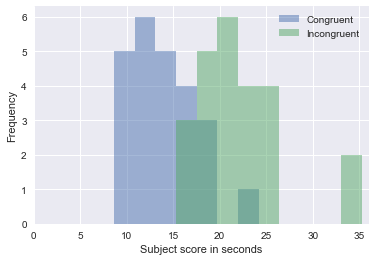

In [6]:
# histogram (bin size is about 2.5 seconds)
stroop_df.plot.hist(bins=12,alpha=0.5)
plt.xlabel('Subject score in seconds')
plt.xlim([0,36])
plt.legend(['Congruent','Incongruent']);

The number of datapoint is relatively small, but the range of scores is quite high, as can be seen in the statistics description table. A bin size of about 2.5s was found to be a good trade-off for visualizing the histogram. 

According to the histograms above, the distributions of congruent and incongruent samples show a similar shape (slightly positively skewed). The distribution of the incongruent sample can be seen, as a first estimate, as a translated version of the congruent distribution. The translation is towards higher subject score, which is in line with the trend observed on the measures of central tendency. 

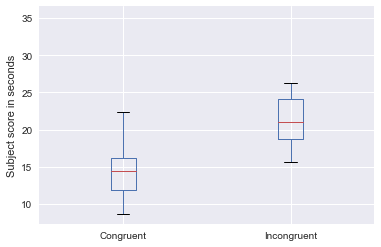

In [7]:
# boxplots
stroop_df.boxplot()
plt.ylabel('Subject score in seconds');

In the comparative boxplots, the "translation" of the incongruent sample towards higher subject scores is also clearly visible. The size of the box, which symbolizes the interquartile range, is also larger for the incongruent sample. This is in line with what we discussed earlier (see discussion at the end of the subsection dealing with the measures of variability).   

### Check of the test assumptions

Before going on with the test, let us discuss the assumptions of a t-test for dependent means. The 4 main assumptions are summarized in <a href="#ref3">ref3</a> and explained with more details in <a href="#ref4">ref4</a>. As written in <a href="#ref4">ref4</a>, these assumptions refer to the differences between the two sets of values (here the scores in congruent and incongruent conditions):
- The dependent variable must be continuous. This assumption is verified here, as a response time is a continous variable.
- The observations are independent of one another. This assumption is also verified, given that each observation correspond to a different subject.
- The dependent variable should be approximately normally distributed and should not contain any outliers. We propose to check these last 2 assumptions by plotting the histogram and boxplot of the difference between scores.


We start by creating a new variable Diff_I_C with the difference between scores in incongruent and congruent conditions:

In [8]:
Diff_I_C = stroop_df['Incongruent'] - stroop_df['Congruent']
Diff_I_C.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
dtype: float64

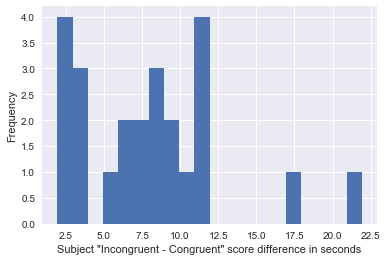

In [9]:
# histogram (bin size is about 1 second)
Diff_I_C.plot.hist(bins=20)
plt.xlabel('Subject "Incongruent - Congruent" score difference in seconds');

The distribution is not normal (about 30% of the values are below 4s). According to <a href="#ref3">ref3</a>, "the t-test for dependent means is considered typically "robust" for violations of normal distribution". Here, the data is not highly (positively) skewed, therefore no serious error shall be introduced into the test.

Finally, let us focus on the presence of outliers in the data. By convention a value can be considered as an outlier when it is either 1.5 IQR below the first quartile or 1.5 IQR above the 3rd quartile. We these two limit values:

In [10]:
Outlier_lower_lim = Diff_I_C.quantile(q=0.25) - 1.5*(Diff_I_C.quantile(q=0.75)-Diff_I_C.quantile(q=0.25))
Outlier_upper_lim = Diff_I_C.quantile(q=0.75) + 1.5*(Diff_I_C.quantile(q=0.75)-Diff_I_C.quantile(q=0.25))
print('A value of this data sample can be considered as an outlier if below {:.2f}s or above {:.2f}s.'\
      .format(Outlier_lower_lim,Outlier_upper_lim))

A value of this data sample can be considered as an outlier if below -6.27s or above 20.18s.


The lower outlier limit is below 0s, so there is no outlier in this region. On the other hand, we saw above with the describe function that the maximum value is about 22s, which is slightly above the upper outlier limit. 
Let us have a look at the boxplot to see whether there are other outliers in the upper region.

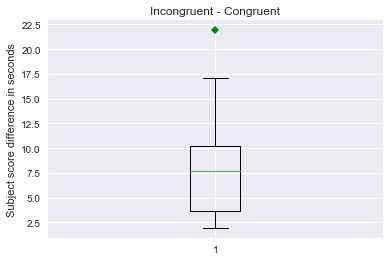

In [11]:
# boxplot
# the outliers will be depicted as green diamonds.
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Incongruent - Congruent')
ax1.boxplot(Diff_I_C,flierprops=green_diamond)
plt.ylabel('Subject score difference in seconds');

We see that there is only one outlier. We remove this point from the dataset before going on with the test:

In [12]:
#Use idxmax to get index of the outlier. Then drop this row from stroop_df dataframe
stroop2_df = stroop_df.drop([Diff_I_C.idxmax()])

In [13]:
len(stroop2_df)

23

<a id='test'></a>
## Statistical test and results

### t-Test and interpretation

In order to perform the t-test, we will go through the following steps:
- compute the size of the sample and its degrees of freedom
- compute the difference between incongruent and congruent scores for each subject
- compute the mean and standard deviation of this difference
- compute the standard error and the t-statistics
- consult the t-table to find the critical t-statistics for a one-tailed distribution knowing the alpha level (.05) and the number of degrees of freedom
- reject or fail to reject the null hypothesis based on comparison between t-statistics and t-critical.

In [14]:
n = len(stroop2_df)
df = n-1
print('The sample size is n = {}; the number of degrees of freedom is df = {}.'.format(n,df))

The sample size is n = 23; the number of degrees of freedom is df = 22.


In [15]:
# Note that we can also compute the sample-by-sample difference, and then take the mean of this new variable
D = stroop2_df['Incongruent'] - stroop2_df['Congruent']
Md = D.mean()
S = D.std(ddof=1) #ddof=1 to compute sample standard deviation
print('The mean of the difference between the samples is Md = {:.2f} seconds.'.format(Md))
print('The standard deviation of the difference between the samples is S = {:.2f} seconds.'.format(S))

The mean of the difference between the samples is Md = 7.36 seconds.
The standard deviation of the difference between the samples is S = 3.94 seconds.


In [16]:
# Std error
SE = S/np.sqrt(n)
t_stat = Md/SE
print('The t-statistics is {:.3f}'.format(t_stat))

The t-statistics is 8.961


According to the t-table (<a href="#ref5">ref5</a>), the critical t-value for df=22 and an alpha level of .05 in a one-tailed t-distribution in positive direction is 1.717.

The obtained t-score is higher than the t-critical value. $\mathbf{We\,reject\,the\,null\,assumption\,}$ $H_0$. The probability of randomly choosing a sample of size n=23 for which the difference between sample means is about 7.4s is less than .05. This result is statistically significant. 


### Additional results

Now, we compute the 95% confidence interval (CI) for the difference between population means. According to the t-table (<a href="#ref5">ref5</a>), the t-critical value for df=22 and an alpha level of .05 in a two-tailed t-distribution is 2.074.

In [17]:
CI_lower = Md - 2.074*SE
CI_upper = Md + 2.074*SE
print('With a probability of 95%, the mean score in incongruent condition is between {:.1f}s and {:.1f}s above the mean score in congruent condition.'.format(CI_lower,CI_upper))

With a probability of 95%, the mean score in incongruent condition is between 5.7s and 9.1s above the mean score in congruent condition.


We also compute Cohen's d:

In [18]:
# Cohen's d is the mean difference expressed in standard deviation unit:
d = Md/S
print("Cohen's d (mean difference expressed in standard deviation unit) is: {:.2f}".format(d))

Cohen's d (mean difference expressed in standard deviation unit) is: 1.87


Finally we compute and interpret the coefficient of determination $r^2$:

In [19]:
r2 = t_stat**2/(t_stat**2+df)
print('The coefficient of determination is: {:.2f}'.format(r2))
print('Interpretation of this coefficient: ')
print('{:.0%} of the differences in response time for the sample of 23 people are due to the congruency/incongruency of the stimulis.'. \
     format(r2))

The coefficient of determination is: 0.78
Interpretation of this coefficient: 
78% of the differences in response time for the sample of 23 people are due to the congruency/incongruency of the stimulis.


<a id='conclusions'></a>
## Conclusions

The results match up with our expectation according to which the response time would be longer in incongruent condition. Note that the reason why this response time is longer is the object of different interpretations (see <a href="#ref2">ref2</a>): processing speed theory, selective attention theory, automacity theory... 

Several variations of the original Stroop test are briefly presented in the the same Wikipedia article (<a href="#ref2">ref2</a>). The common factor of these variations is that they use visual stimulis (the subject see something and must say out loud something). With my background of acoustical engineer, I came to think about a variant of the Stroop test using audio simulis. 

Indeed, we can draw a parallel between the color of the ink (at the end the wavelength of the electromagnetic radiation reflected by the ink) and the tone of a sound (wavelength of the soundwave). The experiment would be the following:
- The subjects would be presented with a series of audio samples. 
- Each audio sample would consist in the word 'low', 'medium' or 'high', pronounced by a speaker. 
- There would several speakers, for instance 5 having a low-tone voice (typically a bass voice type operatic music), 5 having a medium-tone voice (baritone voice type) and 5 having a high-pitch voice (tenor type). 
- The task would be for the subject (i.e. the listener) to describe the pitch of the audio sample they heard. The answer can be low, medium or high.
- In order not to "pollute" the audio channel, the subject would answer by clicking on the answer (on a tablet for instance).
- In congruent condition, the series of audio samples would consist in a random selection of 'high' pronounced by high-pitch speakers, 'medium' pronounced by mid-tone speakers and 'low' pronounced by low-pitch speakers.
- In incongruent condition, the tone of the audio sample would not match with the meaning of the pronounced word, for instance 'high' pronounced with a deep bass voice, then 'low' pronounced by a high-pitch speaker...

With such experiment, we expect the total response time (for the series of audio sample) to be longer in incongruent condition than in congruent condition. If statistically confirmed, the result would have to be interpreted using a  psychoacoustical approach.

<a id='ref'></a>
## References

<a id='ref1'></a> ref1: https://www.nintendo.fr/Jeux/Nintendo-DS/Programme-d-Entrainement-Cerebral-du-Dr-Kawashima-Quel-age-a-votre-cerveau--270627.html

<a id='ref2'></a> ref2: https://en.wikipedia.org/wiki/Stroop_effect

<a id='ref3'></a> ref3: http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm

<a id='ref4'></a> ref4: http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

<a id='ref5'></a> ref5: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg